<a href="https://colab.research.google.com/github/Briankim254/DSAIL-recruitment-notebook-solution/blob/main/DSAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Consider the functionf(x, y) = (1.5 − x + xy)2 + (2.25 − x + xy2)2 + (2.625 − x + xy3)2.
 Write python code to determine its minimum with −4.5 ≤ x, y ≤ 4.5.




In [47]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [48]:
def objective_function(params):
    x, y = params
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

In [49]:
initial_guess = [0.0, 0.0]

In [50]:
bounds = [(-4.5, 4.5), (-4.5, 4.5)]

In [51]:
result = minimize(objective_function, initial_guess, bounds=bounds)

In [52]:
x_min, y_min = result.x
min_value = result.fun

In [53]:
print(f"Minimum point: (x, y) = ({x_min}, {y_min})")
print(f"Minimum value of the function: {min_value}")

Minimum point: (x, y) = (3.000000954208383, 0.5000002666553034)
Minimum value of the function: 1.665530209948989e-13


End of Question 1.


2. The data in data q2.csv are believed to be drawn from a Gaussian distribution.
 Using python, plot a histogram of these data and superimpose a Gaussian with the appropriate mean and variance.

In [54]:
data_q2 = np.genfromtxt('data_q2.csv', delimiter=',', skip_header=1)

In [55]:
mean = np.mean(data_q2)
std_dev = np.std(data_q2)

In [56]:
x = np.linspace(min(data_q2), max(data_q2), 100)

In [57]:
gaussian = norm.pdf(x, mean, std_dev)

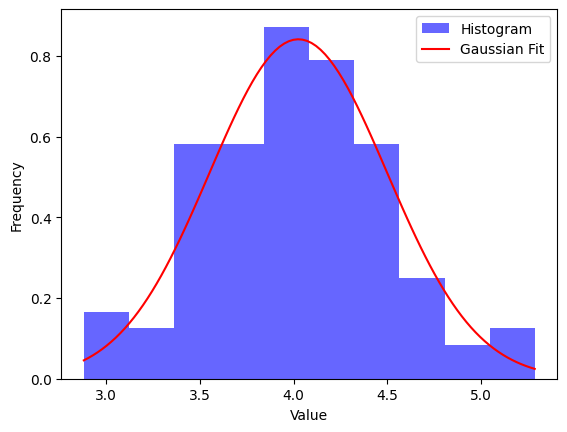

In [58]:
plt.hist(data_q2, bins=10, density=True, alpha=0.6, color='b', label='Histogram')

plt.plot(x, gaussian, 'r', label='Gaussian Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

*End of Question 2.

3. We make measurements of a quantity y which is believed to be related to another variable
x. We take N observations which are modeled as
yi = β0 + β1xi + i where i
is observation noise for i = 1, . . . , N. β0 and β1 are real constants which we need
to estimate. We estimate them as
βˆ
1 =
PN
i=1(xi − x ̄)(yi − y ̄)
PN
i=1(xi − x ̄)
2
and
βˆ
0 =  ̄y − βˆ
1x ̄ where  ̄x =
1
N
PN
i=1 xi and  ̄y =
1
N
PN
i=1 yi
.
The data in data q3.csv correspond to xi and yi for i = 1, . . . , N. Write python code to
determine βˆ
0 and βˆ
1 and plot the data as well as the line y = βˆ
0 + βˆ
1x.

In [59]:
data_q3 = pd.read_csv('data_q3.csv')

In [60]:
x = data_q3['x']
y = data_q3['y']

In [61]:
x_bar = np.mean(x)
y_bar = np.mean(y)

In [62]:
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar) ** 2)
beta_hat1 = numerator / denominator

In [63]:
beta_hat0 = y_bar - beta_hat1 * x_bar

In [64]:
print(f'Estimated beta_hat0: {beta_hat0:.4f}')
print(f'Estimated beta_hat1: {beta_hat1:.4f}')

Estimated beta_hat0: -0.0809
Estimated beta_hat1: 0.4609


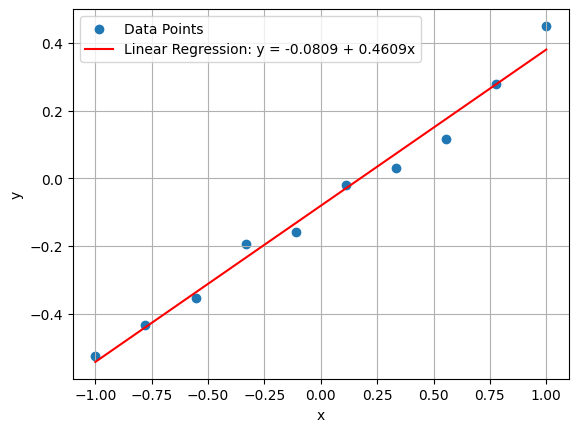

In [65]:
plt.scatter(x, y, label='Data Points')
x_range = np.linspace(min(x), max(x), 100)
y_pred = beta_hat0 + beta_hat1 * x_range
plt.plot(x_range, y_pred, 'r', label=f'Linear Regression: y = {beta_hat0:.4f} + {beta_hat1:.4f}x')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid()
plt.show()